<a href="https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Wojtek/OPTIMIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OPTIMIZER:**


##-------------------------------
## Function can take 1 or 2 parameters to optimization.
- Default: 2 parameters (you need to set values for minMax1 and minMax2)
- For 1 parameter optimization set argument: "minMax2 = False"

##-------------------------------
## ** func** : 
- enter your function there
                   
####IMPORTANT:
- if function has **1 parameter**:  **minMax1 = [min, max]**,   **minMax2 = False**
- if function has **2 parameters**: **minMax1 = [min1, max1], minMax2 = [min2, max2]**
                   
##**steps**:  
- number of iterations of recurency
  
##**minMax1/2**:  
- list of min and max value of parameters to begin with (ex. [min, max])
  
##**split**:  
- number of parts in which function will split values of parameters
**higher value -> better accuracy & longer calculation time**
(Possible values range 2 -- 10)
                   
##**reduceSplit**:  
- If **True** - with every repetition of recurency will reduce split by one
  
##**searchMaximum**: 
 - If **True** - function will search for **maximum values**
 - If **False** - function will search fo **minimum values**
 
##-------------------------------

In [0]:

class optimizer:
  """
  -------------------------------
  Function can take 1 or 2 parameters to optimization.
  Default: 2 parameters (you need to set values for minMax1 and minMax2)
           For 1 parameter optimization set argument: "minMax2 = False"

  -------------------------------
  func        -->  enter your function there
                   IMPORTANT:
                   * if function has 1 parameter:  minMax1 = [min, max],   minMax2 = False
                   * if function has 2 parameters: minMax1 = [min1, max1], minMax2 = [min2, max2]
                   
  steps       -->  number of iterations of recurency
  
  minMax1/2   -->  list of min and max value of parameters to begin with (ex. [min, max])
  
  split        -->  number of parts in which function will split values of parameters
                   higher value -> better accuracy & longer calculation time
                   (Values range 2 -- 10)
                   
  reduceSplit -->  If True: with every repetition of recurency will reduce split by one
  
  -------------------------------
  """
  
  import matplotlib.pyplot as plt
  import math
  
  
  
  def __init__(self, func, steps, minMax1, minMax2=False, split = 4, reduceSplit = False, searchMaximum = True):
    self.plotData = []
    self.iterationCounter = 0
    self.iterationsLeft = steps
    self.recurencyCounter = 0
    self.bestResults = []
    
    self.resetIterators()
    self.optimize(func,
                  steps,
                  minMax1,
                  minMax2,
                  split,
                  reduceSplit,
                  searchMaximum = searchMaximum,
                  iLeft = steps+1)
    print(self.bestResults)
    xData = [num[1] for num in self.plotData]
    yData = [num[0] for num in self.plotData]
    self.create_plot_optimizer(xData, yData, 'Iterations', 'Result')
#     return self.bestResults
  
 
  #--------------------

  def returnStepList(self, minValue, maxValue, nrSteps):
      step = math.fabs(maxValue - minValue)/nrSteps
      actualMin = min([minValue, maxValue])
      actualMax = max([minValue, maxValue])
      return [actualMin + step*nr for nr in range(nrSteps + 1)]

  def resetIterators(self):
    self.plotData = []
    self.iterationCounter = 0
    self.recurencyCounter = 0


  def create_plot_optimizer(self, x_data, y_data=0, xLabel = 'X', yLabel = 'Y'):
      import matplotlib.pyplot as plt

      if y_data == 0:  
          unzip = list(zip(*x_data))
          x_data, y_data = unzip[0],unzip[1]
      plt.plot(x_data, y_data)
      plt.xlabel(xLabel)
      plt.ylabel(yLabel)
      plt.show()

  def findBestSolution(self, searchMaximum):
      best = [0]
      for res in self.bestResults:
        if searchMaximum:
          if res[0] >= best[0]:
            best = res
        else:
          if res[0] <= best[0]:
            best = res
      
      
      if len(self.bestResults[0]) == 2:
        print('\n------------------ACHIEVED RESULTS------------------\n')
        print("{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                            best[0],
                                            'PARAMETER 1: ',
                                            best[1]))
#               return bestResult
      elif len(self.bestResults[0]) == 3:
        print('\n------------------ACHIEVED RESULTS------------------\n')
        print("{:<20}{}\n{:<20}{}\n{:<20}{}\n".format('RESULT: ',
                                                      best[0],
                                                      'PARAMETER 1: ',
                                                      best[1],
                                                      'PARAMETER 2: ',
                                                      best[2]))
      else:
        print("no optimization results record")
        
        
  def optimize(self, func, steps, minMax1, minMax2 = False, split = 4, reduceSplit = False, 
               searchMaximum = True, iLeft = None):
      
      bestResult = []
      
      localICounter = 0
      iL = iLeft
      sMax = searchMaximum
      singleParam = False
      bestPair = [None, None]
      resultList = []
      parametersList=[]

      if reduceSplit is False:
        newSplit = split
      else:
        if split > 2:
          newSplit = split - 1
        else:
          newSplit = 2
      if split > 10:
        raise ValueError("Too big value of 'split' parameter! This would highly increase number of iterations")
      if minMax2 is False:
        singleParam = True

      self.recurencyCounter += 1

      if isinstance(minMax1, list) and (isinstance(minMax2, list) or singleParam) :

          stepList1 = self.returnStepList(minMax1[0], minMax1[1], split)
          if singleParam:
            stepList2 = [1]
          else:
            stepList2 = self.returnStepList(minMax2[0], minMax2[1], split)
          
          nrIterations = len(stepList1)*len(stepList2)
          i1 = 0
          i2 = 0



          for el1 in stepList1:
              i2 = 0
              for el2 in stepList2:
                  self.iterationCounter += 1
                  localICounter += 1
                  print("---Iteration: {0}/{1} ----Recurency: {2}/{3}".format(localICounter, 
                                                              nrIterations,
                                                              self.recurencyCounter,
                                                              iL))

                  #----function----
                  if singleParam:
                    evaluation = func(el1)
                  else:
                    evaluation = func(el1, el2)
                  #----function----

                  if len(resultList) > 0:
                      #----condition----
                      if sMax:
                        if evaluation >= max(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2
                      else:
                        if evaluation <= min(resultList):
                            bestPair[0] = i1
                            bestPair[1] = i2

                      #----condition----

                  else:
                    if singleParam:
                      bestPair[0] = i1
                    else:
                      bestPair[0] = i1
                      bestPair[1] = i2

                  self.plotData.append([evaluation, self.iterationCounter])

                  resultList.append(evaluation)
                  if singleParam:
                    parametersList.append([el1])
                  else:
                    parametersList.append([el1, el2])

                  i2 += 1
              i1 += 1

          #------------------------------------------------


          if bestPair[0] == stepList1.index(stepList1[0]):
              minMax1[0] = stepList1[bestPair[0]]/2
              minMax1[1] = stepList1[bestPair[0] + 1]
  #                 print("best values of PARAM_1 are close to MIN value")

          elif bestPair[0] == stepList1.index(stepList1[-1]):
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0]]*2
  #                 print("best values of PARAM_1 are close to MAX value")


          else:
              minMax1[0] = stepList1[bestPair[0] - 1]
              minMax1[1] = stepList1[bestPair[0] + 1]

          #------------------------------------------------
          if not singleParam:
            if bestPair[1] == stepList2.index(stepList2[0]):
                minMax2[0] = stepList1[bestPair[1]]/2
                minMax2[1] = stepList1[bestPair[1] + 1]
  #                 print("best values of PARAM_2 are close to MIN value")

            elif bestPair[1] == stepList2.index(stepList2[-1]):
                minMax2[0] = stepList1[bestPair[1] - 1]
                minMax2[1] = stepList1[bestPair[1]]*2
  #                 print("best values of PARAM_2 are close to MAX value")


            else:
                minMax2[0] = stepList2[bestPair[1] - 1]
                minMax2[1] = stepList2[bestPair[1] + 1]

          #------------------------------------------------
          if sMax:
            result = max(resultList)
            param1 = parametersList[resultList.index(max(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(max(resultList))][1]
          else:
            result = min(resultList)
            param1 = parametersList[resultList.index(min(resultList))][0]
            if not singleParam:
              param2 = parametersList[resultList.index(min(resultList))][1]
          
          if singleParam:
            self.bestResults.append([result, param1])
          else:
            self.bestResults.append([result, param1, param2])

          if steps > 0:
            if singleParam:
              print("---------------------------------------------------------\n")
              self.optimize(func,
                           steps - 1,
                           [minMax1[0],minMax1[1]],
                           minMax2 = False,
                           split = newSplit,
                           reduceSplit=reduceSplit,
                           searchMaximum = sMax,
                           iLeft = iL )
            else:
              print("---------------------------------------------------------\n")
              self.optimize(func,
                           steps - 1,
                           [minMax1[0], minMax1[1]],
                           minMax2=[minMax2[0], minMax2[1]],
                           split = newSplit,
                           reduceSplit=reduceSplit,
                           searchMaximum = sMax,
                           iLeft = iL)
            
          else:
            self.findBestSolution(searchMaximum)

      else:
          print("enter correct value!")


#**EXAMPLE:**


---Iteration: 1/121 ----Recurency: 1/13
---Iteration: 2/121 ----Recurency: 1/13
---Iteration: 3/121 ----Recurency: 1/13
---Iteration: 4/121 ----Recurency: 1/13
---Iteration: 5/121 ----Recurency: 1/13
---Iteration: 6/121 ----Recurency: 1/13
---Iteration: 7/121 ----Recurency: 1/13
---Iteration: 8/121 ----Recurency: 1/13
---Iteration: 9/121 ----Recurency: 1/13
---Iteration: 10/121 ----Recurency: 1/13
---Iteration: 11/121 ----Recurency: 1/13
---Iteration: 12/121 ----Recurency: 1/13
---Iteration: 13/121 ----Recurency: 1/13
---Iteration: 14/121 ----Recurency: 1/13
---Iteration: 15/121 ----Recurency: 1/13
---Iteration: 16/121 ----Recurency: 1/13
---Iteration: 17/121 ----Recurency: 1/13
---Iteration: 18/121 ----Recurency: 1/13
---Iteration: 19/121 ----Recurency: 1/13
---Iteration: 20/121 ----Recurency: 1/13
---Iteration: 21/121 ----Recurency: 1/13
---Iteration: 22/121 ----Recurency: 1/13
---Iteration: 23/121 ----Recurency: 1/13
---Iteration: 24/121 ----Recurency: 1/13
---Iteration: 25/121 ----

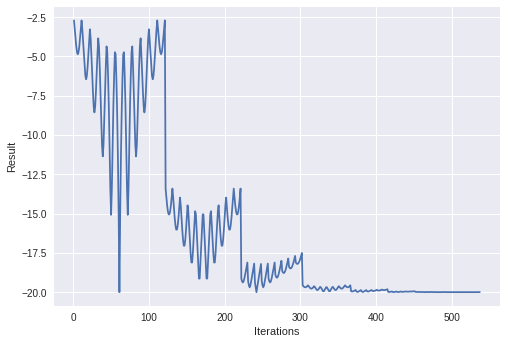

In [5]:
import math

def exampleFunction(x, y = 5):
  import math
  return ((-20)* math.exp((((0.5*(x**2 + y**2))**0.5)*(-0.2))))


optimizer(exampleFunction, 12 , [-10,10], minMax2=[-10, 10],  split = 10, reduceSplit = True, searchMaximum = False)
